# Analysis of the results for Experiment 3

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dtypes = {'Dataset': 'category',
          ' Model': 'category',
          ' Seed': np.int32,
          ' Aug': 'category',
          ' BestEpoch': np.int32,
          ' TestAcc': np.float64,
          ' TestLoss': np.float64,
          ' ValAcc': np.float64,
          ' ValLoss': np.float64,
          ' Device': 'category',
          ' Time': np.float64
          }

In [8]:
results = pd.read_csv('../results/train_log_exp3_2nd_file.csv', header=0, dtype=dtypes)
columns = [x.strip() for x in list(dtypes.keys())]
results.columns = columns

In [9]:
results.head()

,Dataset,Model,Seed,Aug,BestEpoch,TestAcc,TestLoss,ValAcc,ValLoss,Device,Time
0,IMDB-BINARY,GCN,1314,Vanilla,136,0.700,0.7624,0.68,1.1394,cpu,275.95
1,IMDB-BINARY,GCN,1314,G-Mixup,6,0.760,0.5180,0.68,0.5254,cpu,288.35
2,IMDB-BINARY,GCN,1314,Subgraph,36,0.745,1.3456,0.71,1.5321,cpu,74.98
3,IMDB-BINARY,GCN,1314,DropEdge,3,0.715,0.6268,0.69,0.6022,cpu,123.67
4,IMDB-BINARY,GCN,1314,DropNode,7,0.770,0.4938,0.72,0.5869,cpu,81.34


In [10]:
grouped = results.groupby(['Aug', 'Model', 'Dataset']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestAcc']]
grouped

C:\Users\ermin.omeragic\AppData\Local\Temp\ipykernel_23160\1816575529.py:1: FutureWarning: ['Device'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  grouped = results.groupby(['Aug', 'Model', 'Dataset']).agg([np.mean, np.std, np.count_nonzero]).loc[:,['TestAcc']]


TestAcc                        
                                          mean       std count_nonzero
Aug       Model     Dataset                                           
 DropEdge  DiffPool IMDB-BINARY       0.719000  0.025473          10.0
                    IMDB-MULTI        0.490667  0.017413          10.0
                    REDDIT-BINARY          NaN       NaN           NaN
                    REDDIT-MULTI-12K       NaN       NaN           NaN
                    REDDIT-MULTI-5K        NaN       NaN           NaN
...                                        ...       ...           ...
 Vanilla   TopKPool IMDB-BINARY       0.706500  0.031977          10.0
                    IMDB-MULTI        0.493333  0.025724          10.0
                    REDDIT-BINARY          NaN       NaN           NaN
                    REDDIT-MULTI-12K       NaN       NaN           NaN
                    REDDIT-MULTI-5K        NaN       NaN           NaN

[125 rows x 3 columns]

### Analysis of train/val/test losses

In [18]:
def clean_df(x):
    try:
        return x.strip()
    except AttributeError:
        return x

In [ ]:
loss_df = pd.read_csv('../results/losses_2.txt', header=None)
loss_df[4] = loss_df[4].apply(lambda x: x[2:])
loss_df[302] = loss_df[302].apply(lambda x: x[:-1])
loss_df = loss_df.drop(loss_df.columns[2], axis=1)
loss_df = loss_df.applymap(clean_df)
loss_df.iloc[:,3:] = loss_df.iloc[:,3:].astype('float32')

In [45]:
grouped_mean = loss_df.groupby([0,1,3]).agg(np.mean)
grouped_sd = loss_df.groupby([0,1,3]).agg(np.std)

In [46]:
grouped_mean.index = grouped_mean.index.map('_'.join)
grouped_sd.index = grouped_sd.index.map('_'.join)

In [51]:
grouped_mean.loc['IMDB-BINARY_Vanilla_train',:103]

4      26.269629
5       1.952080
6       0.742989
7       0.597119
8       0.541970
         ...    
99      0.356207
100     0.352134
101     0.362981
102     0.375293
103     0.361132
Name: IMDB-BINARY_Vanilla_train, Length: 100, dtype: float32

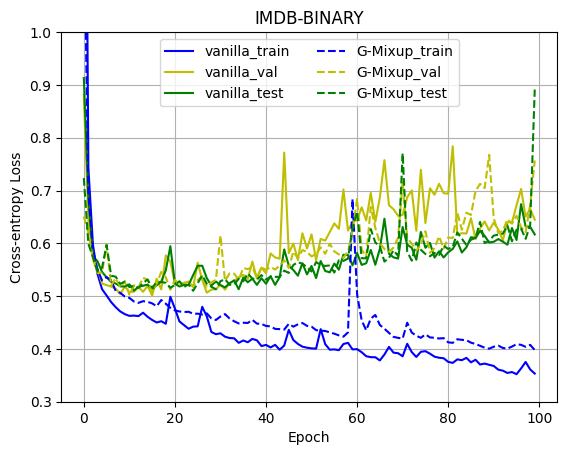

In [86]:
fig, ax = plt.subplots()
ax.plot(range(100), grouped_mean.loc['IMDB-BINARY_Vanilla_train',5:104], 'b-', label='vanilla_train')
ax.plot(range(100), grouped_mean.loc['IMDB-BINARY_Vanilla_val', 5:104], 'y-', label='vanilla_val')
ax.plot(range(100), grouped_mean.loc['IMDB-BINARY_Vanilla_test', 5:104], 'g-', label='vanilla_test')
ax.plot(range(100), grouped_mean.loc['IMDB-BINARY_G-Mixup_train', 5:104], 'b--', label='G-Mixup_train')
ax.plot(range(100), grouped_mean.loc['IMDB-BINARY_G-Mixup_val', 5:104], 'y--', label='G-Mixup_val')
ax.plot(range(100), grouped_mean.loc['IMDB-BINARY_G-Mixup_test', 5:104], 'g--', label='G-Mixup_test')
ax.legend(ncol=2)
ax.set_ylim(0.3, 1.0)
ax.grid(0.5)
ax.set_xlabel('Epoch')
ax.set_ylabel('Cross-entropy Loss')
ax.set_title('IMDB-BINARY')
plt.savefig('../fig/IMDB-B_losses.png', facecolor='white', bbox_inches='tight')

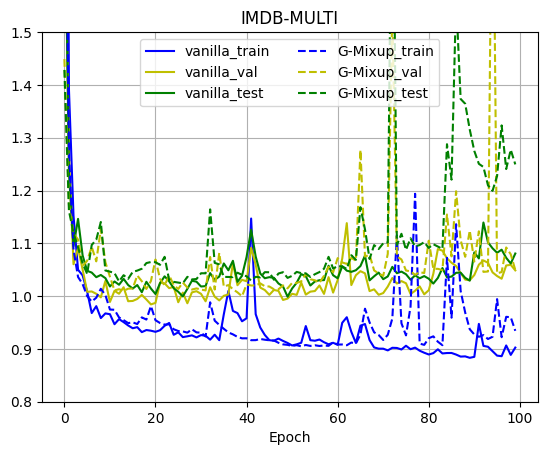

In [87]:
fig, ax = plt.subplots()
ax.plot(range(100), grouped_mean.loc['IMDB-MULTI_Vanilla_train',5:104], 'b-', label='vanilla_train')
ax.plot(range(100), grouped_mean.loc['IMDB-MULTI_Vanilla_val', 5:104], 'y-', label='vanilla_val')
ax.plot(range(100), grouped_mean.loc['IMDB-MULTI_Vanilla_test', 5:104], 'g-', label='vanilla_test')
ax.plot(range(100), grouped_mean.loc['IMDB-MULTI_G-Mixup_train', 5:104], 'b--', label='G-Mixup_train')
ax.plot(range(100), grouped_mean.loc['IMDB-MULTI_G-Mixup_val', 5:104], 'y--', label='G-Mixup_val')
ax.plot(range(100), grouped_mean.loc['IMDB-MULTI_G-Mixup_test', 5:104], 'g--', label='G-Mixup_test')
ax.legend(ncol=2)
ax.set_ylim(0.8, 1.5)
ax.grid(0.5)
ax.set_xlabel('Epoch')
ax.set_title('IMDB-MULTI')
plt.savefig('../fig/IMDB-M_losses.png', facecolor='white', bbox_inches='tight')

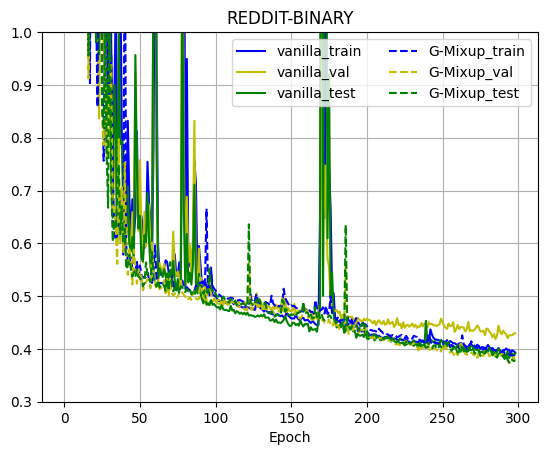

In [88]:
fig, ax = plt.subplots()
ax.plot(range(299), grouped_mean.loc['REDDIT-BINARY_Vanilla_train',4:], 'b-', label='vanilla_train')
ax.plot(range(299), grouped_mean.loc['REDDIT-BINARY_Vanilla_val', 4:], 'y-', label='vanilla_val')
ax.plot(range(299), grouped_mean.loc['REDDIT-BINARY_Vanilla_test', 4:], 'g-', label='vanilla_test')
ax.plot(range(299), grouped_mean.loc['REDDIT-BINARY_G-Mixup_train', 4:], 'b--', label='G-Mixup_train')
ax.plot(range(299), grouped_mean.loc['REDDIT-BINARY_G-Mixup_val', 4:], 'y--', label='G-Mixup_val')
ax.plot(range(299), grouped_mean.loc['REDDIT-BINARY_G-Mixup_test', 4:], 'g--', label='G-Mixup_test')
ax.legend(ncol=2)
ax.set_ylim(0.3, 1.0)
ax.grid(0.5)
ax.set_xlabel('Epoch')
ax.set_title('REDDIT-BINARY')
plt.savefig('../fig/REDDIT-B_losses.png', facecolor='white', bbox_inches='tight')

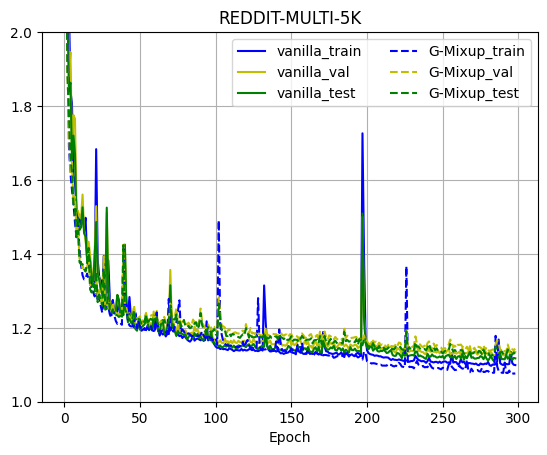

In [89]:
fig, ax = plt.subplots()
ax.plot(range(299), grouped_mean.loc['REDDIT-MULTI-5K_Vanilla_train',4:], 'b-', label='vanilla_train')
ax.plot(range(299), grouped_mean.loc['REDDIT-MULTI-5K_Vanilla_val', 4:], 'y-', label='vanilla_val')
ax.plot(range(299), grouped_mean.loc['REDDIT-MULTI-5K_Vanilla_test', 4:], 'g-', label='vanilla_test')
ax.plot(range(299), grouped_mean.loc['REDDIT-MULTI-5K_G-Mixup_train', 4:], 'b--', label='G-Mixup_train')
ax.plot(range(299), grouped_mean.loc['REDDIT-MULTI-5K_G-Mixup_val', 4:], 'y--', label='G-Mixup_val')
ax.plot(range(299), grouped_mean.loc['REDDIT-MULTI-5K_G-Mixup_test', 4:], 'g--', label='G-Mixup_test')
ax.legend(ncol=2)
ax.set_ylim(1.0, 2.0)
ax.grid(0.5)
ax.set_xlabel('Epoch')
ax.set_title('REDDIT-MULTI-5K')
plt.savefig('../fig/REDDIT-5K_losses.png', facecolor='white', bbox_inches='tight')